# Estimate the physiological equivalent temperature
This project aims to apply PET as thermal comfort indice to evalute the indoor comfort.

### Import packages

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import plotly.graph_objects as go
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import math
import plotly.io as pio
pio.renderers.default = "svg"

import pet_cal

### Import dataset and data preprocessing

In [2]:
path = r'C:\Users\Jacky\Jupyter Projects\Office_Data'
df = pd.read_excel(path+r'\Office_k_MRT.xlsx')

# Calculate the pressure of water vapor (hpa)
df['P_w'] = 611*np.exp((17.27*(df['T_in']))/(237.3+(df['T_in'])))/100
# Atmospheric pressure (hpa)
p = 1013
df

,Time,T_in,RH,T_out,Occ,HRV,DoW,T_bdg_pred,MRT,P_w
0,2020-07-01 00:00:00,30.2,88.0,28.4,0,0.0,3,28.400000,28.400000,42.933884
1,2020-07-01 00:30:00,30.3,88.7,28.3,0,0.0,3,28.390000,28.390000,43.180388
2,2020-07-01 01:00:00,30.3,88.8,28.1,0,0.0,3,28.361000,28.361000,43.180388
3,2020-07-01 01:30:00,30.3,89.5,28.0,0,0.0,3,28.324900,28.324900,43.180388
4,2020-07-01 02:00:00,30.4,90.4,27.9,0,0.0,3,28.282410,28.282410,43.428122
...,...,...,...,...,...,...,...,...,...,...
4411,2020-09-30 21:30:00,26.7,92.8,22.3,0,0.0,3,24.750387,24.750387,35.042155
4412,2020-09-30 22:00:00,26.7,93.0,22.4,0,0.0,3,24.515349,24.515349,35.042155
4413,2020-09-30 22:30:00,26.6,92.1,22.6,0,0.0,3,24.323814,24.323814,34.836632
4414,2020-09-30 23:00:00,26.5,92.9,22.6,0,0.0,3,24.151432,24.151432,34.632160


### Parameters setting and PET calculation 
The PET calculator is originated from part of ladybug-tools [1].

The calculator function is attached in the repository.

Some parameters of the PET calculator may be modified in this application for the real situation.

In [4]:
# for a male doing office work with Taiwanese average body feature
sex = 1 
age = 35
ht = 1.75
mbody = 75
work = 70
icl = 0.7

# Set initial values
PET = np.zeros([np.size(df,0)])

# Calculate the PET by pet_cal function
for i in range(len(df)):
     pet_res = pet_cal.pet_cal(df['T_in'][i],df['P_w'][i],p,df['HRV'][i],df['MRT'][i],sex,age,ht,mbody,work,icl).pet
     PET[i] = pet_res

# Print results
df['PET'] = PET
df 

,Time,T_in,RH,T_out,Occ,HRV,DoW,T_bdg_pred,MRT,P_w,PET
0,2020-07-01 00:00:00,30.2,88.0,28.4,0,0.0,3,28.400000,28.400000,42.933884,29.762
1,2020-07-01 00:30:00,30.3,88.7,28.3,0,0.0,3,28.390000,28.390000,43.180388,29.792
2,2020-07-01 01:00:00,30.3,88.8,28.1,0,0.0,3,28.361000,28.361000,43.180388,29.770
3,2020-07-01 01:30:00,30.3,89.5,28.0,0,0.0,3,28.324900,28.324900,43.180388,29.750
4,2020-07-01 02:00:00,30.4,90.4,27.9,0,0.0,3,28.282410,28.282410,43.428122,29.757
...,...,...,...,...,...,...,...,...,...,...,...
4411,2020-09-30 21:30:00,26.7,92.8,22.3,0,0.0,3,24.750387,24.750387,35.042155,25.978
4412,2020-09-30 22:00:00,26.7,93.0,22.4,0,0.0,3,24.515349,24.515349,35.042155,25.786
4413,2020-09-30 22:30:00,26.6,92.1,22.6,0,0.0,3,24.323814,24.323814,34.836632,25.623
4414,2020-09-30 23:00:00,26.5,92.9,22.6,0,0.0,3,24.151432,24.151432,34.632160,25.490


### Select an example for office comfort present
The selected data will be plotted as gauge chart.

In [5]:
expl = pd.DataFrame(data=df.iloc[2999:3002])
expl.reset_index(inplace=True, drop=True)
expl

,Time,T_in,RH,T_out,Occ,HRV,DoW,T_bdg_pred,MRT,P_w,PET
0,2020-09-01 11:30:00,24.9,58.4,30.4,3,0.15,2,26.844658,28.276612,31.499888,26.772
1,2020-09-01 12:00:00,27.5,57.2,30.9,4,0.15,2,27.512329,27.521411,36.724723,27.759
2,2020-09-01 12:30:00,26.6,57.1,31.5,3,0.15,2,27.637397,28.397819,34.836632,27.722


Plot the example.

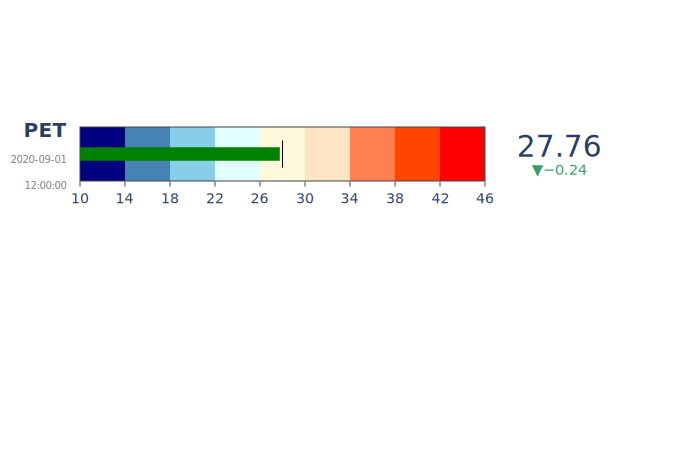

In [6]:
# Select 2020-09-01 12:00
Time = expl['Time'][1]
PET_value = expl['PET'][1]

# Plot the gauge chart
fig = go.Figure()
fig.add_trace(go.Indicator(
    mode = "number+gauge+delta",
    value = PET_value,
    domain = {'x': [0, 1], 'y': [0.7, 0.9]},
    title = {'text': F"<b>PET</b><br><span style='color: gray; font-size:0.5em'>{Time.date()}<br>{Time.time()}</span>", 'font': {"size": 20}},
    delta = {'reference': 28, 'increasing': {'color': '#FF4136'}, 'decreasing': {'color': "#3D9970"}},
    gauge = {
        'shape': "bullet", # the shape can also change to "angular" 
        'axis': {'range': [10, 46], 'tickvals':[10,14,18,22,26,30,34,38,42,46],
                 'tickfont': {'size': 14}},
        'threshold': {
            'line': {'color': "black", 'width': 1},
            'thickness': 0.5,
            'value': 28},
            'steps': [
                {'range': [10, 14], 'color': "navy"},
                {'range': [14, 18], 'color': "steelblue"},
                {'range': [18, 22], 'color': "skyblue"},
                {'range': [22, 26], 'color': "lightcyan"},
                {'range': [26, 30], 'color': "cornsilk"},
                {'range': [30, 34], 'color': "bisque"},
                {'range': [34, 38], 'color': "coral"},
                {'range': [38, 42], 'color': "orangered"},
                {'range': [42, 46], 'color': "red"}]
        }
    ))
fig.show()

#### Note:

The color steps of the thermal sensation and PET levels refer to the local study of residents' thermal comfort [2].

Where the comfort zone is between PET 26-30 degrees. 

And the neutral point is at 28 degrees.

### Reference
[1]

Ladybug tools<br>
https://github.com/ladybug-tools/ladybug-legacy/blob/master/src/Ladybug_Thermal%20Comfort%20Indices.py

[2]

T.-P. Lin, A. Matzarakis, Tourism climate and thermal comfort in Sun Moon Lake, Taiwan. International Journal of Biometeorology 52, 281-290 (2008).